In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats as st
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [12]:
file = '/content/drive/MyDrive/Colab Notebooks/PCOS/Infertility/PCOS_infertility.xlsx'
df = pd.read_excel(file,
sheet_name=0,
header=0,
index_col=False,
keep_default_na=True
)

# df.drop('Unnamed: 42', axis=1, inplace=True)
df.drop('Patient File No.', axis=1, inplace=True)
df.drop('Sl. No', axis=1, inplace=True)
df

,PCOS (Y/N),I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),AMH(ng/mL)
0,0,1.99,1.99,2.07
1,0,60.80,1.99,1.53
2,1,494.08,494.08,6.63
3,0,1.99,1.99,1.22
4,0,801.45,801.45,2.26
...,...,...,...,...
536,0,1.99,1.99,1.7
537,0,80.13,1.99,5.6
538,0,1.99,1.99,3.7
539,0,292.92,1.99,5.2


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PCOS (Y/N)              541 non-null    int64  
 1     I   beta-HCG(mIU/mL)  541 non-null    float64
 2   II    beta-HCG(mIU/mL)  541 non-null    float64
 3   AMH(ng/mL)              541 non-null    object 
dtypes: float64(2), int64(1), object(1)
memory usage: 17.0+ KB


In [14]:
for col in df.columns:
  print(col)
  print(df[col].value_counts(sort=True))

PCOS (Y/N)
0    364
1    177
Name: PCOS (Y/N), dtype: int64
  I   beta-HCG(mIU/mL)
1.99      191
10.00      11
2.00        7
15.00       4
1.97        3
         ... 
108.66      1
569.30      1
2.58        1
896.60      1
292.92      1
Name:   I   beta-HCG(mIU/mL), Length: 307, dtype: int64
II    beta-HCG(mIU/mL)
1.99      307
2.00        8
15.00       6
12.00       6
1.90        3
         ... 
569.10      1
236.50      1
896.60      1
2.58        1
5.81        1
Name: II    beta-HCG(mIU/mL), Length: 203, dtype: int64
AMH(ng/mL)
1.00    9
2.50    9
4.50    7
1.20    6
4.20    6
       ..
0.45    1
2.53    1
0.29    1
5.67    1
7.60    1
Name: AMH(ng/mL), Length: 301, dtype: int64


In [47]:


# df['AMH(ng/mL)'] = df['AMH(ng/mL)'].astype(str).astype(float)
df[df.eq("a").any(1)]
# df.drop(305, 0, inplace=True)

df.applymap(np.isreal).all(1)
df[~df.applymap(np.isreal).all(1)]


,PCOS (Y/N),I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),AMH(ng/mL),PCOS-val
0,0,1,1,2,No
1,0,60,1,1,No
2,1,494,494,6,Yes
3,0,1,1,1,No
4,0,801,801,2,No
...,...,...,...,...,...
536,0,1,1,1,No
537,0,80,1,5,No
538,0,1,1,3,No
539,0,292,1,5,No


In [17]:
# df['AMH(ng/mL)'].astype(str).astype(int)
# Transform AMH(ng/mL) from object to  integer
cols=df.dropna(axis=1).columns
df[cols]=df[cols].astype(float).astype(int)


In [18]:
display(df.describe(include='all').T)

,count,mean,std,min,25%,50%,75%,max
PCOS (Y/N),540.0,0.327778,0.469839,0.0,0.0,0.0,1.00,1.0
I beta-HCG(mIU/mL),540.0,665.061111,3351.975541,1.0,1.0,19.0,297.75,32460.0
II beta-HCG(mIU/mL),540.0,237.920370,1605.344604,0.0,1.0,1.0,97.50,25000.0
AMH(ng/mL),540.0,5.174074,5.897019,0.0,2.0,3.0,6.25,66.0


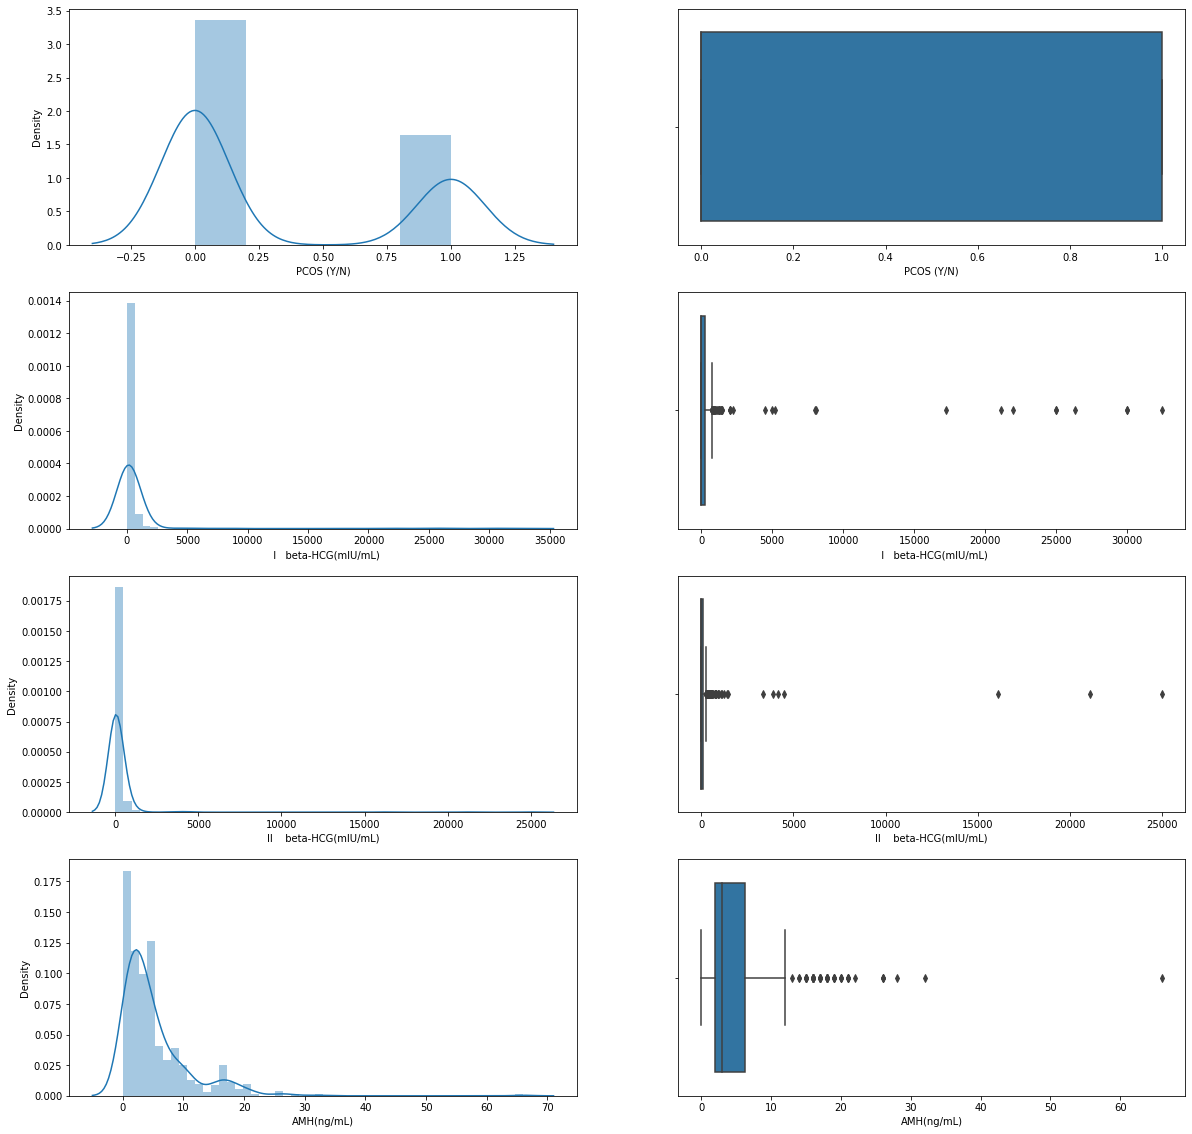

In [47]:
# i = 0
# j = 0
# ncol = 5
# nrow = 14
# all_cols = df.columns.drop('PCOS (Y/N)')

# fig,axes=plt.subplots(nrows=nrow,ncols=ncol,figsize=(20,40))

# for col in df.columns:
#   sns.distplot(df[col], ax=axes[i, j])
#   if j < ncol-1:
#     j += 1
#   else:
#     j = 0
#     if i < nrow-1:
#       i += 1
#     else:
#       i = 0
#   sns.boxplot(df[col], ax=axes[i, j])
#   if j < ncol-1:
#     j += 1
#   else:
#     j = 0
#     if i < nrow-1:
#       i += 1
#     else:
#       i = 0

# # plt.show()


fig,axes=plt.subplots(nrows=4,ncols=2,figsize=(20,20))
nr,nc=0,0
for col in df.columns:
    sns.distplot(df[col],ax=axes[nr,nc])
    if nc==1: nr,nc=nr+1,0
    else: nc+=1
    sns.boxplot(df[col],orient='h',ax=axes[nr,nc])
    if nc==1: nr,nc=nr+1,0
    else: nc+=1
plt.show()

In [24]:
df['PCOS-val'] = df['PCOS (Y/N)'].replace({0 : 'No', 1: 'Yes'})

In [35]:
allCols = df.columns.drop('PCOS-val')
allCols

Index(['PCOS (Y/N)', '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)',
       'AMH(ng/mL)'],
      dtype='object')

In [39]:
def plot_var(df, col_name, full_name, continuous):
    """
    Visualize a variable with and without faceting on the loan status.
    - col_name is the variable name in the dataframe
    - full_name is the full variable name
    - continuous is True if the variable is continuous, False otherwise
    """
    f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,5), dpi=50)
    
    # Plot without outcome
    if continuous:
        sns.distplot(df.loc[df[col_name].notnull(), col_name], kde=False, ax=ax1)
    else:
        sns.countplot(df[col_name], order=sorted(df[col_name].unique()), color='#5975A4', saturation=1, ax=ax1)
    ax1.set_xlabel(full_name)
    ax1.set_ylabel('Count')
    ax1.set_title(full_name)

    # Plot with loan status
    if continuous:
        sns.boxplot(x=col_name, y='PCOS-val', data=df, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(full_name + ' by PCOS')
    else:
        charge_off_rates = df.groupby(col_name)['PCOS-val'].value_counts(normalize=True).loc[:,'Yes']
        sns.barplot(x=charge_off_rates.index, y=charge_off_rates.values, color='#5975A4', saturation=1, ax=ax2)
        ax2.set_ylabel('Fraction of PCOS disease')
        ax2.set_title('PCOS Rate by ' + full_name)
    ax2.set_xlabel(full_name)
    
    plt.tight_layout()

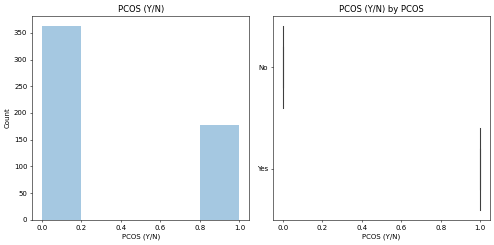

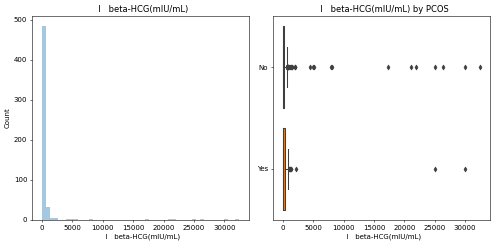

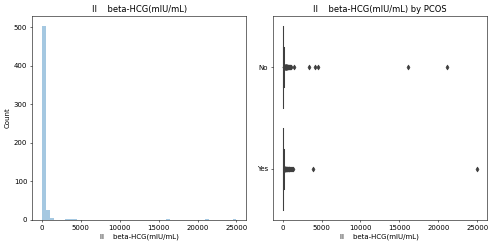

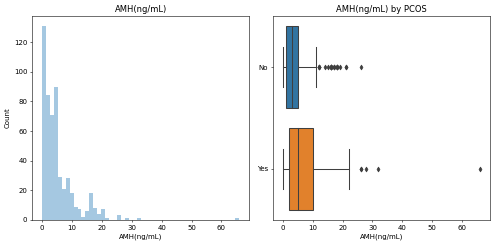

In [40]:
for col in allCols:
  plot_var(df, col, col, continuous=True)

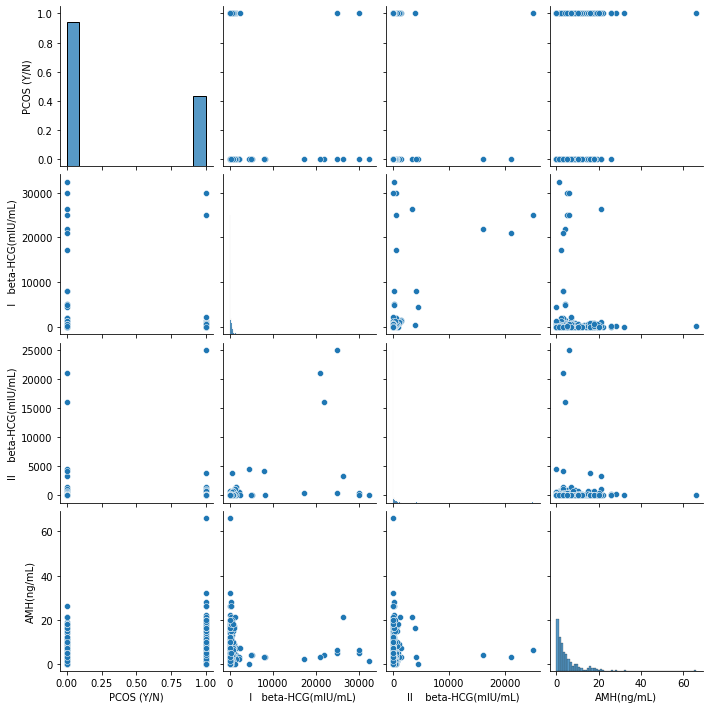

In [53]:
sns.pairplot(df)
plt.show()

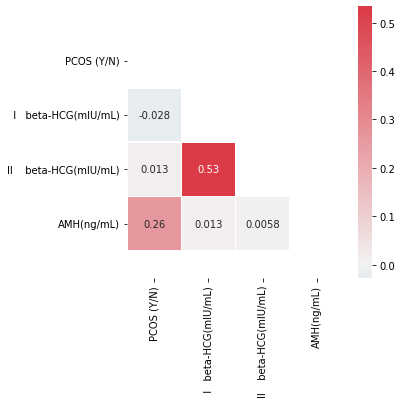

In [60]:
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(df.corr(),mask=np.triu(np.ones_like(df.corr(),dtype=np.bool)),center=0,annot=True,ax=ax,
            cmap=sns.diverging_palette(220, 10, as_cmap=True),linewidth=.5,square=True)

b, t = plt.ylim()
plt.ylim(b+0.5, t-0.5)

plt.show()

In [49]:




x_train, x_test, y_train, y_test = train_test_split(df.drop(['PCOS (Y/N)', 'PCOS-val'],1),df['PCOS (Y/N)'], test_size=0.33, random_state=42)
print("""
x_train: {}
x_test:  {}
y_train: {}
y_test:  {}
""".format(len(x_train), len(x_test), len(y_train), len(y_test)))


x_train: 361
x_test:  179
y_train: 361
y_test:  179



In [52]:
model = LogisticRegression()
rez = model.fit(x_train, y_train)
print(rez.coef_)
# print('R Square:  {:.3f}'.format(rez.score(x_train, y_train)))
# print('Intercept: {:.3f}'.format(rez.intercept_))
# print('Coefs:    ', rez.coef_)

[[-0.00018233  0.00021461  0.11266614]]


In [54]:
for coef in rez.coef_:
  print(np.e**coef)

[0.99981769 1.00021463 1.1192582 ]


In [67]:

y_hat = rez.predict(x_test) #predicted values
print(y_hat)

[ 0.46437181  0.21278646  0.58801599  0.2756828   0.21291989  0.25471735
  0.29664824  0.29664824  0.25285809  0.27665073  0.2756828   0.52648841
  0.38252523  0.26904133  0.21278646  0.33857914  0.54445996  0.23375191
  0.27544867  0.25122436  0.21281291  0.29664824  0.29664824  0.25470358
  0.23346269  0.34118673  0.88368071  0.27657139  0.29747866  0.23521174
  0.34040392  0.40144793  0.33456998  0.33592107  0.27276306  0.21278646
  0.52859574  0.31845997  0.29663447  0.75652458  0.2756828   0.25471735
  0.25575726  0.33150015  0.27569338  0.23362796  0.23375191  0.25532562
  0.58170826  0.22554668  0.22800884  0.31596101  0.31761369  0.23375191
  0.25471735  0.25615755  0.2264288  -0.07467404  0.31638156  0.40147547
  0.23375191  0.02505066  0.25871073  0.23375191  0.23371059  0.42244092
  0.39487851  0.25532562  0.27343791  0.38051003  0.29664824  0.23375191
  0.50977191  0.27645503  0.25172875  0.44273152  0.24466763  0.2777456
  0.31761369  0.31761369  0.31364843  0.2338524   0.

In [73]:
import statsmodels.api as sm

x = df.drop('PCOS (Y/N)',1)
y = df['PCOS (Y/N)']
mod = sm.OLS(y, sm.add_constant(x))
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             PCOS (Y/N)   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     13.73
Date:                Sat, 21 May 2022   Prob (F-statistic):           1.22e-08
Time:                        10:07:00   Log-Likelihood:                -337.84
No. Observations:                 540   AIC:                             683.7
Df Residuals:                     536   BIC:                             700.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.2212      0.026      8.418      0.000       0.170       0.273
  I   beta-HCG(mIU/mL) -7.287e-06    6.9e-06     -1.056      0.291   -2.08e-05    6.27e-06
II    beta-HCG(mIU/mL)  1.135e-05   1.44e-05      0.788      0.431   -1.69e-05    3.96e-05
AMH(ng/mL)                 0.0210      0.003      6.336      0.000       0.014       0.028
==============================================================================
Omnibus:                      410.807   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               80.365
Skew:                           0.727   Prob(JB):                     3.54e-18
Kurtosis:                       1.792   Cond. No.                     4.79e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.79e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""